In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check the shape of the data (number of rows and columns).
Check the general information about the dataframe using the .info() method.

In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Inference:-
- The Mean survival rate is 0.38 showing 38% survived
- PClass the mean pclass is 2.3 showing maximum passengers were in 2nd class
- The average age of people who travelled was around 29.6 years
- The average sibling shows around 0.52 around 52% of passengers travelled with their siblings
- Parch shows 0.38 showing atleast 38% were travelling with parents or children
- The mean fare is around 32.20

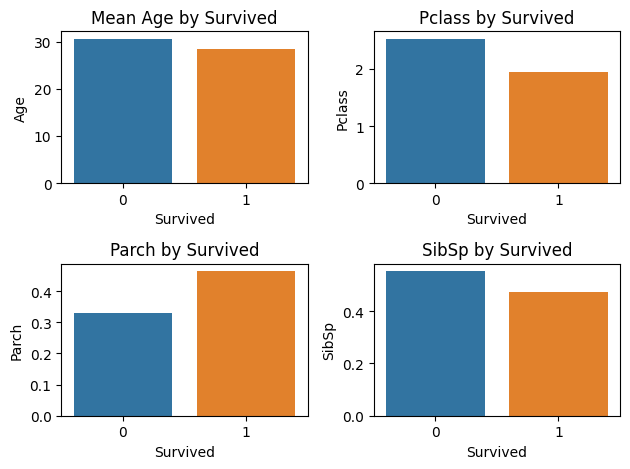

In [7]:
# Plot 1: Mean Age by Survived
plt.subplot(2, 2, 1)
sns.barplot(x='Survived', y='Age', data=train_data, ci=None)
plt.title('Mean Age by Survived')

# Plot 2: Pclass by Survived
plt.subplot(2, 2, 2)
sns.barplot(x='Survived', y='Pclass', data=train_data, ci=None)
plt.title('Pclass by Survived')

# Plot 3: Parch by Survived
plt.subplot(2, 2, 3)
sns.barplot(x='Survived', y='Parch', data=train_data, ci=None)
plt.title('Parch by Survived')

# Plot 4: SibSp by Survived
plt.subplot(2, 2, 4)
sns.barplot(x='Survived', y='SibSp', data=train_data, ci=None)
plt.title('SibSp by Survived')

plt.tight_layout()
plt.show()

Inference
- From the plots above we can say that there were more survivors where parents were together
- Many youngsters perished in the mishap .
- Many passengers with siblings also didn't survive the mishap.¶

Barplot showing Mean Fare by Passenger Class and Survived


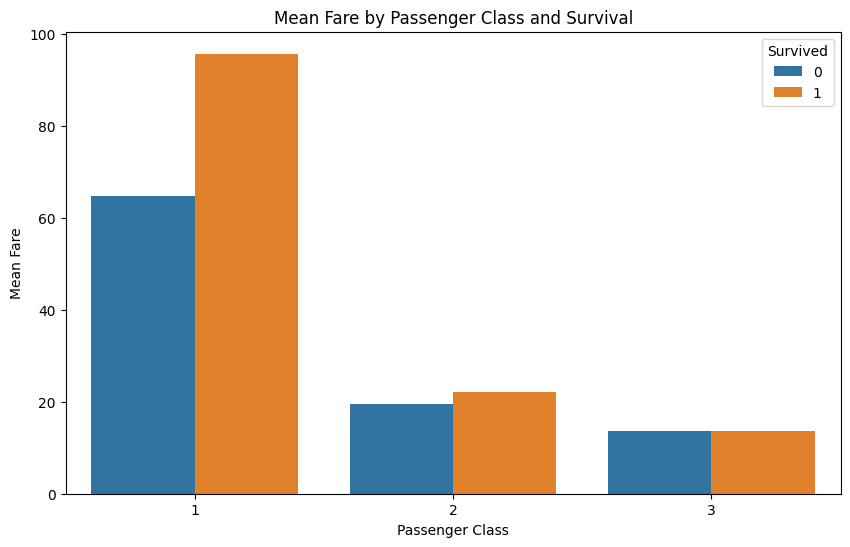

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=train_data, ci=None)
plt.title('Mean Fare by Passenger Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Mean Fare')
plt.show()

Inference
- There were more survivors from Passenger class 1

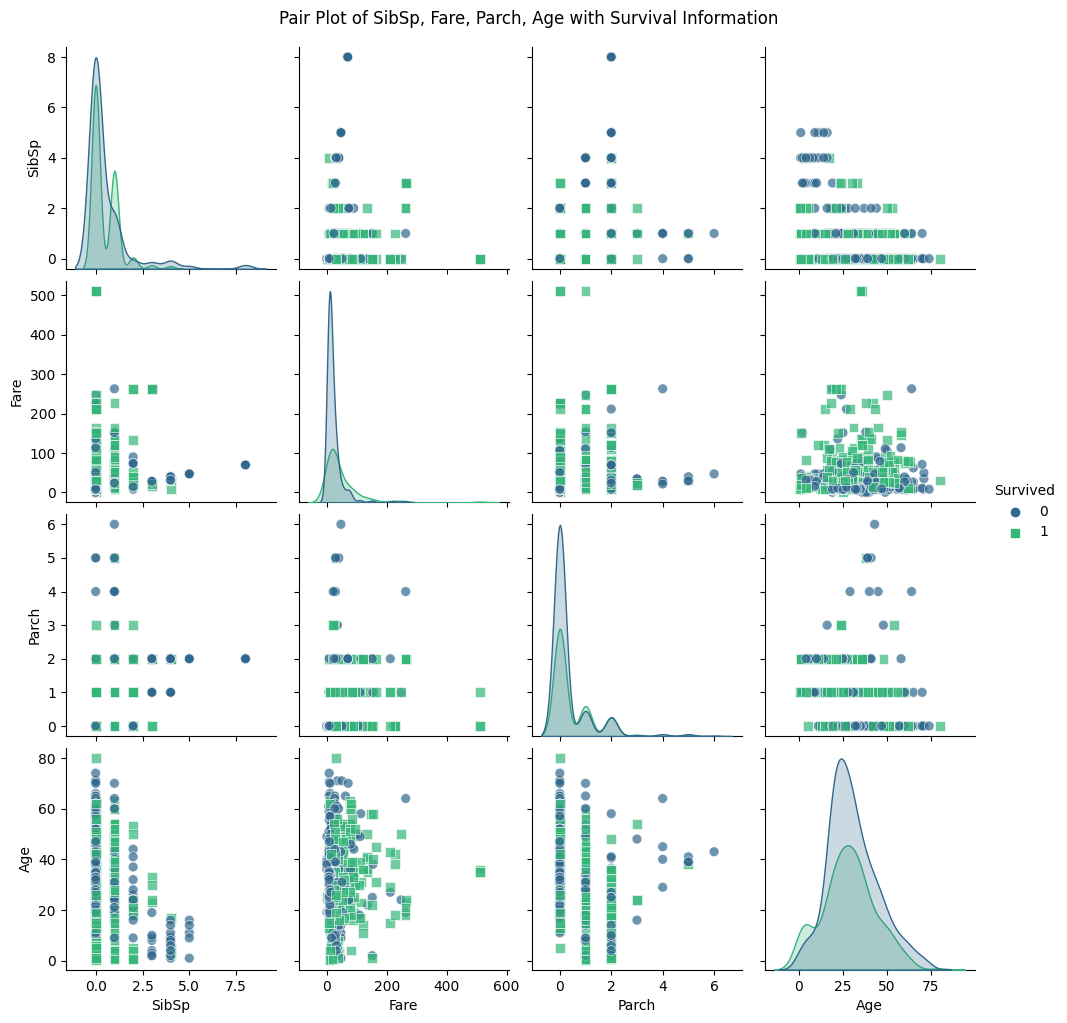

In [9]:
# Select variables for the scatter plot
scatter_vars = ['SibSp', 'Fare', 'Parch', 'Age']

# Create a pair plot with scatter plots for selected variables
sns.pairplot(train_data, vars=scatter_vars, hue='Survived', palette='viridis', markers=["o", "s"], plot_kws={'alpha': 0.7, 's': 50})

# Customize the plot
plt.suptitle('Pair Plot of SibSp, Fare, Parch, Age with Survival Information', y=1.02)
plt.show()

Inference
- We can see that Age has normal distribution with the mean between 27-29
- The Parents children categories have 3 distinct  sub groups ,its also positively skewed with some data points having higher values.
- The Sibling features two distinct subgroups too with some data points with higher values indicating passengers with more siblings perhaps.
- Max survivors in Fare category are concentrated between 0-300

In [10]:
# Extracting the ticket prefix
train_data['TicketPrefix'] = train_data['Ticket'].apply(lambda x: x.split()[0] if len(x.split()) > 1 else 'NoPrefix')
train_data['TicketPrefix']

0           A/5
1            PC
2      STON/O2.
3      NoPrefix
4      NoPrefix
         ...   
886    NoPrefix
887    NoPrefix
888       W./C.
889    NoPrefix
890    NoPrefix
Name: TicketPrefix, Length: 891, dtype: object

Visualize relationship between TicketPrefix and survivors

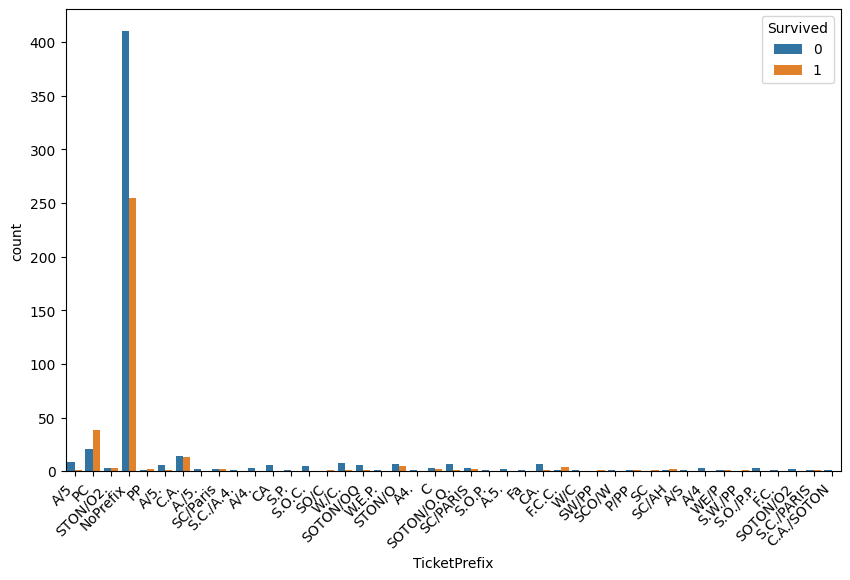

In [11]:
#creating dataframe with ticketprefix and survived
df_plot=pd.concat([train_data['Survived'],train_data['TicketPrefix']],axis=1)

#plot countplot
plt.figure(figsize=(10,6))
sns.countplot(x='TicketPrefix',hue='Survived',data=df_plot)
plt.xticks(rotation=45,ha='right')
plt.title=('Survival Count by TicketPrefix')
plt.xlabel=('TicketPrefix')
plt.ylabel=('Count')
plt.show()
          

In [12]:
train_data.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked,TicketPrefix
count,891,891,891,204,889,891
unique,891,2,681,147,3,43
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S,NoPrefix
freq,1,577,7,4,644,665


Check for missing values

In [13]:
train_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
TicketPrefix      0
dtype: int64

Since the relationship between survivors and tickets is not clear we can remove this field.
We can see there are a lot of missing values in Cabin we can drop it.

In [14]:
dropped_df=train_data.drop(['Cabin','Ticket','PassengerId'],axis=1,inplace=True)

Replacing missing values¶

In [15]:
#Replacing missing values in age with mean
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

#Replace missing values in Embark with the mode

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)


In [16]:
#Checking if codes have been effected
train_data.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
TicketPrefix    0
dtype: int64

Extracting numeric data 

In [17]:
numeric_train_data=train_data.select_dtypes(include=['number'])
numeric_train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


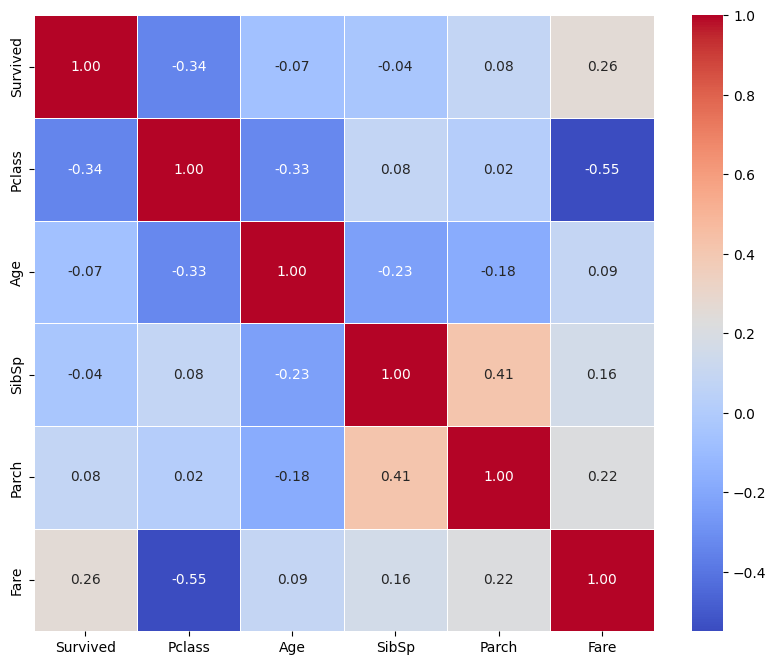

In [18]:
#Calculate Correlation matrix
correlation_matrix=numeric_train_data.corr()

#Creating heat map to visualize correlations
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=.5)
#plt.title('Correlation Heatmap',fontsize=10)
plt.show()

In [19]:
# Extract correlations with 'Survived'
survived_correlations = correlation_matrix['Survived'].drop('Survived')  # Drop 'Survived' with itself

# Print or visualize the correlations
print(survived_correlations)

Pclass   -0.338481
Age      -0.069809
SibSp    -0.035322
Parch     0.081629
Fare      0.257307
Name: Survived, dtype: float64


Insights
- The correlation between fare and survived is 0.257307 which shows moderate positive correlation.
- Positive coreraltion implies the likelihood of higher survival rates with increased fares.
- Passengers who paid higher fares might have access to better accomodation,lifeboats etc

In [ ]:
Categorical variables relation with survived

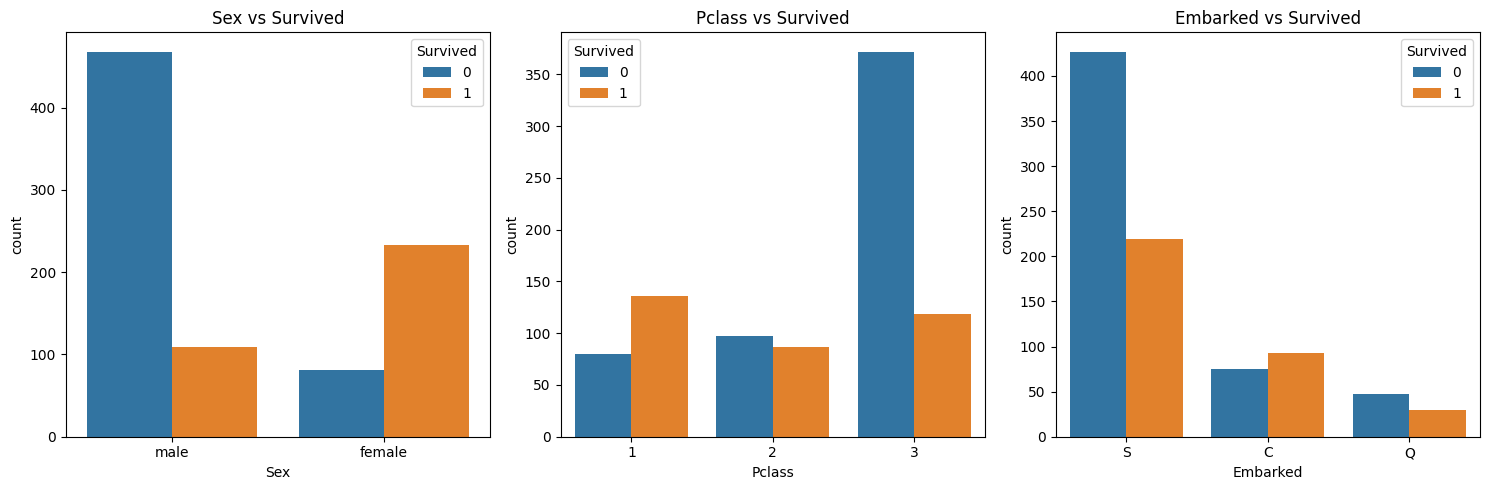

In [20]:
categorical_train_variables = ['Sex', 'Pclass', 'Embarked']
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_train_variables), figsize=(15, 5))

# Loop through each categorical variable
for i, variable in enumerate(categorical_train_variables):
    sns.countplot(x=variable, hue='Survived', data=train_data, ax=axes[i])
    axes[i].set_title(f'{variable} vs Survived')

# Adjust layout and show the plots outside the loop
plt.tight_layout()
plt.show()
      

Insights
- In the first countplot we see that 'male' survivors were lesser than 'female' survivors hinting at probablity of giving preference for evacuation to female and children in an emergency.
- In Pclass vs survived we see that Pclass 3 had the highest number of casualties indicating probablity of higher calsses had access to lefe boats and other saftey measures.
- In Titanic data set S refers to Passengers embarking from 'Southampton' ,C refers to emabrking from Cherbourg in France and Q refers to Queenstown in Irelaand .
- Although Southampton had highest number of survivors ,it also had high number of casualties probably indicating maximum passenger intake from Southampton¶

Encoding the categorical variables

In [21]:
#Manually encoding the categorical variables
train_data['Sex']= train_data['Sex'].map({'male':0,'female':1})
train_data['Embarked']= train_data['Embarked'].map({'S':0,'C':1,'Q':2})

#Dropping unneccessary columns like name
train_data.drop(['Name','TicketPrefix'],axis=1,inplace=True)

train_data.head()     

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


Store the target column (i.e.'Survived') in the y variable and the rest of the columns in the X variable.

In [22]:
X_train= train_data.drop('Survived',axis=1)
y_train = train_data['Survived']
print('X_train.shape',X_train.shape)
print('y_train.shape',y_train.shape)

X_train.shape (891, 7)
y_train.shape (891,)


Standardise the numerical data

In [23]:
# To scale the dimensions we need scale function which is part of sckikit preprocessing libraries
from sklearn.preprocessing import StandardScaler

In [24]:
#Intialising Standard Scaler
ss=StandardScaler()
numeric_train_data_scaled=ss.fit_transform(numeric_train_data)
train_data[numeric_train_data.columns]=numeric_train_data_scaled
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-0.789272,0.827377,0,-0.592481,0.432793,-0.473674,-0.502445,0
1,1.266990,-1.566107,1,0.638789,0.432793,-0.473674,0.786845,1
2,1.266990,0.827377,1,-0.284663,-0.474545,-0.473674,-0.488854,0
3,1.266990,-1.566107,1,0.407926,0.432793,-0.473674,0.420730,0
4,-0.789272,0.827377,0,0.407926,-0.474545,-0.473674,-0.486337,0


Upload test data and gender submission concatenate clean it Apply encoding and scaling¶

In [25]:
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
gender_submission=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [27]:
# Concatenate X_test and y_test along columns
test_data_concatenated = pd.concat([test_data, gender_submission], axis=1)
test_data_concatenated.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,892,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,893,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,894,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,895,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,896,1


In [28]:
# Drop the duplicate PassengerId column from test_data_concatenated
test_data_concatenated = test_data_concatenated.loc[:,~test_data_concatenated.columns.duplicated()]
test_data_concatenated.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [29]:
#Manually encoding the categorical variables
test_data_concatenated['Sex']= test_data_concatenated['Sex'].map({'male':0,'female':1})
test_data_concatenated['Embarked']= test_data_concatenated['Embarked'].map({'S':0,'C':1,'Q':2})

#Dropping unneccessary columns like name
test_data_concatenated.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)

test_data_concatenated.head()     

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,34.5,0,0,7.8292,2,0
1,3,1,47.0,1,0,7.0000,0,1
2,2,0,62.0,0,0,9.6875,2,0
3,3,0,27.0,0,0,8.6625,0,0
4,3,1,22.0,1,1,12.2875,0,1


In [30]:
#Intialising Standard Scaler to test data
ss=StandardScaler()
numeric_test_data=test_data_concatenated.select_dtypes(include=['number'])
numeric_test_data_scaled =ss.fit_transform(numeric_test_data)
test_data_concatenated[numeric_test_data.columns]=numeric_test_data_scaled
test_data_concatenated.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,0.873482,-0.755929,0.298549,-0.499470,-0.400248,-0.497811,2.243165,-0.755929
1,0.873482,1.322876,1.181328,0.616992,-0.400248,-0.512660,-0.677841,1.322876
2,-0.315819,-0.755929,2.240662,-0.499470,-0.400248,-0.464532,2.243165,-0.755929
3,0.873482,-0.755929,-0.231118,-0.499470,-0.400248,-0.482888,-0.677841,-0.755929
4,0.873482,1.322876,-0.584229,0.616992,0.619896,-0.417971,-0.677841,1.322876


In [31]:
X_test = test_data_concatenated.drop('Survived',axis=1)
y_test = test_data_concatenated['Survived']
print('X_test.shape',X_test.shape)
print('y_test.shape',y_test.shape)


X_test.shape (418, 7)
y_test.shape (418,)


Import necessary libraries

In [32]:
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

Define a function with model and data as inputs

In [34]:
def fit_n_predict(model,X_train,y_train,X_test,y_test):
    #Fit the model with data
    model.fit(X_train,y_train)
    
    #Predict on test data
    pred=model.predict(X_test)
    #Calculate the accuracy 
    mse=mean_squared_error(y_test,pred)
    return mse
    

In [36]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with your chosen strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [38]:
print("NaN values in X_train_imputed:", np.isnan(X_train_imputed).sum())
print("NaN values in X_test_imputed:", np.isnan(X_test_imputed).sum())

NaN values in X_train_imputed: 0
NaN values in X_test_imputed: 0


In [39]:
print("NaN values in y_train:", np.isnan(y_train).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

NaN values in y_train: 0
NaN values in y_test: 0


In [41]:
# Print the shape of the arrays
print("Shape of X_train_imputed:", X_train_imputed.shape)
print("Shape of X_test_imputed:", X_test_imputed.shape)

Shape of X_train_imputed: (891, 7)
Shape of X_test_imputed: (418, 7)


In [42]:
# Define models and parameter grids
models = {
    "Random Forest": RandomForestRegressor(min_samples_leaf=5, random_state=0, n_jobs=-1),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(max_leaf_nodes=15, random_state=0, early_stopping=False),
}

param_grids = {
    "Random Forest": {"n_estimators": [10, 20, 50, 100]},
    "Hist Gradient Boosting": {"max_iter": [10, 20, 50, 100, 300, 500]},
}

# Define cross-validation
cv = KFold(n_splits=4, shuffle=True, random_state=0)

# Results list
results = []

# Loop through models
for name, model in models.items():
    # Grid search with cross-validation
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        return_train_score=True,
        cv=cv,
        scoring='neg_mean_squared_error',  # Use neg_mean_squared_error for GridSearchCV with regression
        n_jobs=-1,
    ).fit(X_train_imputed, y_train)  # Use X_train_imputed instead of X_train
    
    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the test set
    mse_test = fit_n_predict(best_model, X_train_imputed, y_train, X_test_imputed, y_test)  # Use X_train_imputed and X_test_imputed
    
    # Store results
    result = {"model": name, "cv_results": grid_search.cv_results_, "mse_test": mse_test}
    results.append(result)

# Print the results
for result in results:
    print(result)

{'model': 'Random Forest', 'cv_results': {'mean_fit_time': array([0.05366695, 0.09118193, 0.20653749, 0.40336663]), 'std_fit_time': array([0.0043046 , 0.00787532, 0.00628029, 0.01540407]), 'mean_score_time': array([0.02014613, 0.01990402, 0.0244115 , 0.04158437]), 'std_score_time': array([0.00410148, 0.00276086, 0.0093874 , 0.01208787]), 'param_n_estimators': masked_array(data=[10, 20, 50, 100],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 10}, {'n_estimators': 20}, {'n_estimators': 50}, {'n_estimators': 100}], 'split0_test_score': array([-0.11585231, -0.11432233, -0.11823232, -0.1171612 ]), 'split1_test_score': array([-0.13442639, -0.1297389 , -0.13029324, -0.12908357]), 'split2_test_score': array([-0.14282133, -0.14179467, -0.14629806, -0.14502114]), 'split3_test_score': array([-0.13317306, -0.13209992, -0.13387472, -0.13570077]), 'mean_test_score': array([-0.13156827, -0.12948895, -0.13217459, -0.131741

In [45]:
# Data for Random Forest
random_forest_data = {
    'model': 'Random Forest',
    'cv_results': {
        'mean_fit_time': [0.05366695, 0.09118193, 0.20653749, 0.40336663],
        'std_fit_time': [0.0043046, 0.00787532, 0.00628029, 0.01540407],
        'mean_score_time': [0.02014613, 0.01990402, 0.0244115, 0.04158437],
        'std_score_time': [0.00410148, 0.00276086, 0.0093874, 0.01208787],
        'param_n_estimators': [10, 20, 50, 100],
        'params': [{'n_estimators': 10}, {'n_estimators': 20}, {'n_estimators': 50}, {'n_estimators': 100}],
        'split0_test_score': [-0.11585231, -0.11432233, -0.11823232, -0.1171612],
        'split1_test_score': [-0.13442639, -0.1297389, -0.13029324, -0.12908357],
        'split2_test_score': [-0.14282133, -0.14179467, -0.14629806, -0.14502114],
        'split3_test_score': [-0.13317306, -0.13209992, -0.13387472, -0.13570077],
        'mean_test_score': [-0.13156827, -0.12948895, -0.13217459, -0.13174167],
        'std_test_score': [0.00980264, 0.00985313, 0.01000361, 0.01014488],
        'rank_test_score': [2, 1, 4, 3],
        'split0_train_score': [-0.08889748, -0.08883928, -0.08683624, -0.08642308],
        'split1_train_score': [-0.08659696, -0.08582777, -0.08578079, -0.08533875],
        'split2_train_score': [-0.08533721, -0.08440189, -0.08293986, -0.08226462],
        'split3_train_score': [-0.085692, -0.08255554, -0.08089211, -0.08042105],
        'mean_train_score': [-0.08663091, -0.08540612, -0.08411225, -0.08361188],
        'std_train_score': [0.00138688, 0.00229666, 0.00234243, 0.00239172]
    },
    'mse_test': 1.528580696378506
}


In [46]:
hist_gradient_boosting_data={
    'model': 'Hist Gradient Boosting',
    'cv_results': {
        'mean_fit_time': [0.03493357, 0.06298977, 0.1474666, 0.28684676, 0.83000511, 1.16268682],
        'std_fit_time': [0.00154347, 0.00322621, 0.00357518, 0.0046901, 0.00618232, 0.23683128],
        'mean_score_time': [0.00179297, 0.00241762, 0.00415176, 0.0073089, 0.01947433, 0.02826363],
        'std_score_time': [8.05042098e-05, 1.10175361e-04, 2.33536285e-04, 3.90552825e-04, 1.72862133e-04, 3.51478556e-03],
        'param_max_iter': [10, 20, 50, 100, 300, 500],
        'params': [{'max_iter': 10}, {'max_iter': 20}, {'max_iter': 50}, {'max_iter': 100}, {'max_iter': 300}, {'max_iter': 500}],
        'split0_test_score': [-0.137126, -0.12199756, -0.11789942, -0.12184556, -0.13366474, -0.14129841],
        'split1_test_score': [-0.14453818, -0.13126774, -0.13661014, -0.13984696, -0.14971654, -0.15818453],
        'split2_test_score': [-0.14780752, -0.14053453, -0.13815293, -0.14221439, -0.14759228, -0.15445975],
        'split3_test_score': [-0.15218652, -0.1412655, -0.13734647, -0.14041644, -0.15456038, -0.16416824],
        'mean_test_score': [-0.14541456, -0.13376633, -0.13250224, -0.13608084, -0.14638348, -0.15452773],
        'std_test_score': [0.00550122, 0.00785482, 0.00844858, 0.00826506, 0.00776528, 0.00838646],
        'rank_test_score': [4, 2, 1, 3, 5, 6],
        'split0_train_score': [-0.13320716, -0.11181116, -0.08836438, -0.07305263, -0.04934206, -0.03856295],
        'split1_train_score': [-0.13256289, -0.11053839, -0.08700292, -0.07189441, -0.04767768, -0.03656987],
        'split2_train_score': [-0.12657098, -0.10569068, -0.08464025, -0.06930449, -0.0464464, -0.03548404],
        'split3_train_score': [-0.12741663, -0.10683443, -0.08578713, -0.06940343, -0.04477005, -0.03429886],
        'mean_train_score': [-0.12993942, -0.10871867, -0.08644867, -0.07091374, -0.04705905, -0.03622893],
        'std_train_score': [0.0029695, 0.00252952, 0.0013861, 0.00161302, 0.00167405, 0.00156875]
    },
    'mse_test': 1.3966457616666854
}
    
    


In [49]:
# Create DataFrames
random_forest_df = pd.DataFrame(random_forest_data)
hist_gradient_boosting_df = pd.DataFrame(hist_gradient_boosting_data)

# Concatenate DataFrames
df = pd.concat([random_forest_df, hist_gradient_boosting_df], ignore_index=True)

# Display the DataFrame
print(df)

                     model                                         cv_results  \
0            Random Forest   [0.05366695, 0.09118193, 0.20653749, 0.40336663]   
1            Random Forest    [0.0043046, 0.00787532, 0.00628029, 0.01540407]   
2            Random Forest    [0.02014613, 0.01990402, 0.0244115, 0.04158437]   
3            Random Forest    [0.00410148, 0.00276086, 0.0093874, 0.01208787]   
4            Random Forest                                  [10, 20, 50, 100]   
5            Random Forest  [{'n_estimators': 10}, {'n_estimators': 20}, {...   
6            Random Forest  [-0.11585231, -0.11432233, -0.11823232, -0.117...   
7            Random Forest  [-0.13442639, -0.1297389, -0.13029324, -0.1290...   
8            Random Forest  [-0.14282133, -0.14179467, -0.14629806, -0.145...   
9            Random Forest  [-0.13317306, -0.13209992, -0.13387472, -0.135...   
10           Random Forest  [-0.13156827, -0.12948895, -0.13217459, -0.131...   
11           Random Forest  

HIST GRADIENT BOOSTING CV RESULTS
1. MAX-ITER: 50
2. MEAN TEST SCORE (NEGATIVE MSE): -0.145415
3. RANK: 1
4. STANDARD DEVIATION : 0.005501
5. MEAN TRAIN SCORE : -0.129939
RANDOM FOREST CV RESULTS
1. N_ESTIMATORS: 20
2. MEAN TEST SCORE (NEGATIVE MSE): -0.131568
3. RANK: 2
4. STANDARD DEVIATION : 0.009803
5. MEAN TRAIN SCORE : -0.086631
- MSE ON TEST FOR HIST GRADIENT BOOSTING IS 1.396646
- MSE ON TEST FOR RANDOM FOREST IS 1.528581
CONCLUSION:- 
-CONSIDERING THE MSE ON TEST AND ALL OTHER PARAMETERS HIST GRADIENT BOOSTING  ALGORITHM WITH MAX-ITER OF 50 IS SLIGHTLY BETTER THAN RANDOM FOREST WITN N_ESTIMATORS 20.¶

In [52]:
#'best_model' is the best model obtained from GridSearchCV
best_model_name = "Hist Gradient Boosting"  # Update with the actual best model name

# Fit the best model with training data
best_model.fit(X_train_imputed, y_train)

# Predict on the test set
predictions = best_model.predict(X_test_imputed)

# Print the name of the model used
print(f"Model used for predictions: {best_model_name}")

# Create a DataFrame with "PassengerId" and "Survived" columns
results_df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
results_df.head(10)

Model used for predictions: Hist Gradient Boosting


,PassengerId,Survived
0,892,0.779614
1,893,0.876097
2,894,0.779614
3,895,0.833867
4,896,0.881900
5,897,0.833867
6,898,0.861543
7,899,0.846977
8,900,0.885537
9,901,0.824440


In [54]:
#save the results to a CSV file
results_df.to_csv('submission.csv', index=False)